In [13]:
import pandas as pd

matches = pd.read_csv('data/matches.csv')

# Our data with H1 to H10 and a Result
matches.head(5)

,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,Result
0,111,80,86,12,19,62,100,102,122,120,1
1,44,26,110,40,35,48,100,101,8,95,0
2,37,96,30,4,87,9,100,89,14,81,0
3,82,118,76,100,102,112,12,110,58,120,0
4,82,117,119,100,48,19,43,110,87,72,1


In [14]:
import numpy as np

heroesDf = pd.read_csv('data/heroes.csv')

# hero count + 1 result column
totalColumns = len(heroesDf) + 1

X = matches.iloc[:, 0:].values

outputRows = np.zeros((X.shape[0], totalColumns), dtype=int)
i = 0
for row in X:
    # Team A 1
    outputRows[i][row[0] - 1] = 1
    outputRows[i][row[1] - 1] = 1
    outputRows[i][row[2] - 1] = 1
    outputRows[i][row[3] - 1] = 1
    outputRows[i][row[4] - 1] = 1
    # Team B -1
    outputRows[i][row[5] - 1] = -1
    outputRows[i][row[6] - 1] = -1
    outputRows[i][row[7] - 1] = -1
    outputRows[i][row[8] - 1] = -1
    outputRows[i][row[9] - 1] = -1
    # Result
    outputRows[i][totalColumns - 1] = row[10]
    i = i + 1

# Combined One Hot Data with 123 columns of heroes and 1 column of result
# 1 mean Team A pick, -1 mean Team B Pick
outputRows[:5, :]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0, -1,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,

In [15]:
oneHotDf = pd.DataFrame(outputRows)
oneHotDf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0,0,0,0,0,0,0,0,0,0,...,0,0,-1,0,-1,0,0,0,0,1
1,0,0,0,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,-1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [19]:
from sklearn.model_selection import train_test_split

X = oneHotDf.iloc[:, 0:-1].values
Y = np.squeeze(oneHotDf.iloc[:, -1:].values)

print(X.shape, Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

(13961, 126) (13961,)


No Skill: ROC AUC = 0.500
LogisticRegression : ROC AUC = 0.563
MAE (probabilities) = 0.489
MAE (class labels) = 0.442


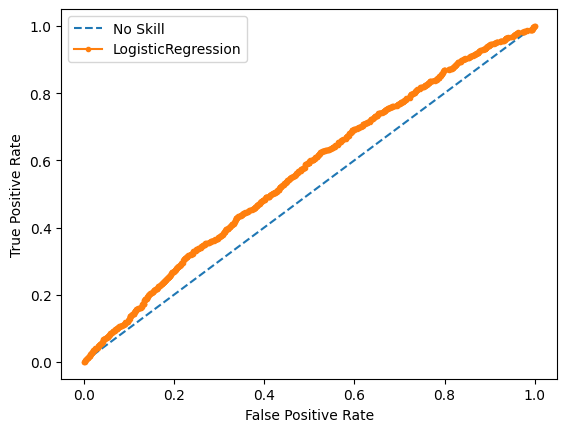

No Skill: ROC AUC = 0.500
AdaBoostClassifier : ROC AUC = 0.552
MAE (probabilities) = 0.498
MAE (class labels) = 0.445


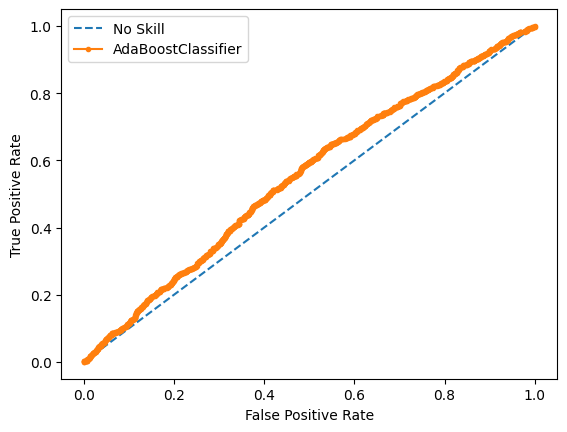

No Skill: ROC AUC = 0.500
LinearDiscriminantAnalysis : ROC AUC = 0.563
MAE (probabilities) = 0.489
MAE (class labels) = 0.444


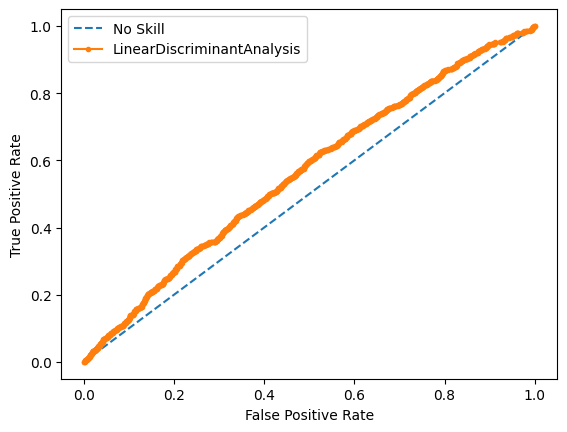

In [17]:
from matplotlib import pyplot
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_curve, roc_auc_score, mean_absolute_error

models = [
    ('LogisticRegression', LogisticRegression(solver='liblinear')),
    ('AdaBoostClassifier', AdaBoostClassifier(n_estimators=1200, algorithm="SAMME")),
    ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis())
]

# ROC Recall Plot
for name, model in models:
    model.fit(X_train, Y_train)
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(Y_test))]
    # Predict probabilities
    y_pred_prob = model.predict_proba(X_test)
    # Predicated class labels
    y_pred = model.predict(X_test)
    # keep probabilities for the positive outcome only
    y_pred_prob_pos = y_pred_prob[:, 1]

    # calculate scores
    ns_auc = roc_auc_score(Y_test, ns_probs)
    lr_auc = roc_auc_score(Y_test, y_pred_prob_pos)
    # summarize scores
    print('No Skill: ROC AUC = %.3f' % ns_auc)
    print(name, ': ROC AUC = %.3f' % lr_auc)
    print("MAE (probabilities) = %.3f" % mean_absolute_error(Y_test, y_pred_prob_pos))
    print("MAE (class labels) = %.3f" % mean_absolute_error(Y_test, y_pred))

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(Y_test, y_pred_prob_pos)

    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label=name)
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.legend()
    pyplot.show()

LogisticRegression : f1=0.627 auc=0.593


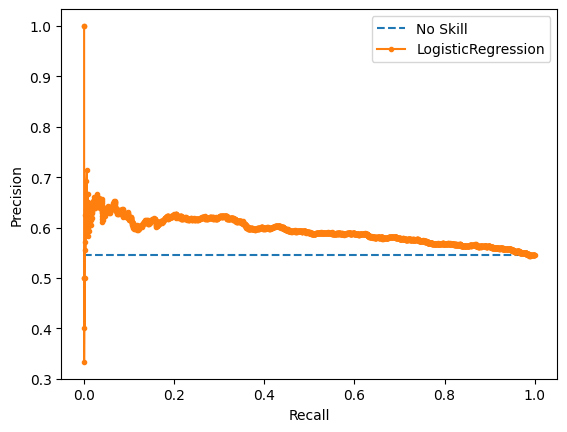

AdaBoostClassifier : f1=0.642 auc=0.581


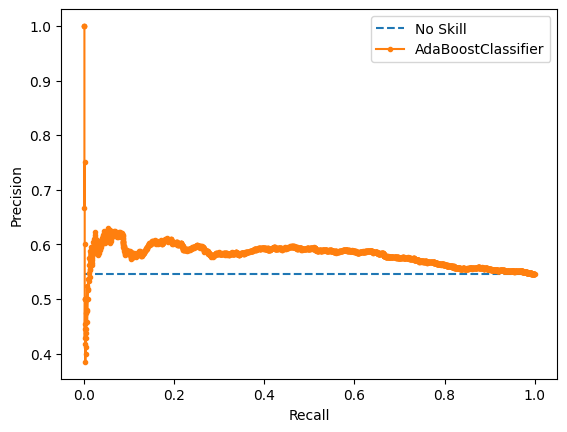

LinearDiscriminantAnalysis : f1=0.625 auc=0.592


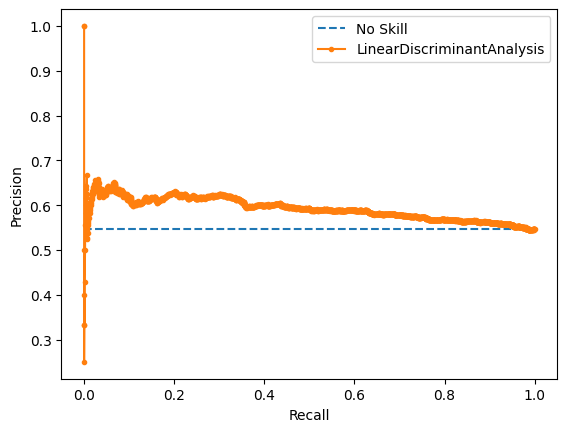

In [18]:
from sklearn.metrics import precision_recall_curve, f1_score

# Precision-Recall Plot
for name, model in models:
    model.fit(X_train, Y_train)
    # predict probabilities
    lr_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # predict class values
    yhat = model.predict(X_test)
    lr_precision, lr_recall, _ = precision_recall_curve(Y_test, lr_probs)
    lr_f1, lr_auc = f1_score(Y_test, yhat), auc(lr_recall, lr_precision)
    # summarize scores
    print(name, ': f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    # plot the precision-recall curves
    no_skill = len(Y_test[Y_test == 1]) / len(Y_test)
    pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    pyplot.plot(lr_recall, lr_precision, marker='.', label=name)
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

## Frequent team combinations (Apriori algorithm)